# Exploratory Analysis

## 2023 Developer Survey conducted by Stack Overflow

In May 2023 over 90,000 developers responded to the annual survey about how they learn and level up, which tools they're using, and which ones they want. Here we explore developer profile and programming, scripting, and markup languages developers used in 2023. The goal is to figure out high-paying professionals and their programming preferences.

## Data Dictionary

`MainBranch` - Which of the following options best describes you today? For the purpose of this survey, a developer is "someone who writes code".

`Age` - What is your age?

`Employment` - Which of the following best describes your current employment status? Select all that apply.

`RemoteWork` - Which best describes your current work situation?

`EdLevel` - Which of the following best describes the highest level of formal education that you’ve completed?

`YearsCode` - Including any education, how many years have you been coding in total?

`YearsCodePro` - NOT including education, how many years have you coded professionally (as a part of your work)?

`DevType` - Which of the following describes your current job, the one you do most of the time? Please select only one.

`Country` - Where do you live?

`ConvertedCompYearly` -  What is your current total annual compensation (salary, bonuses, and perks, before
taxes and deductions)? We converted salaries from user currencies to USD using the exchange rate on June 2, 2023.

`LanguageHaveWorkedWith` - Which programming, scripting, and markup languages have you done extensive development work in over the past year?

`ICorPM` - Are you an individual contributor or people manager?

`WorkExp` - How many years of working experience do you have?

`Industry` - What industry is the company you work for in?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import sys
sys.path.append("../src")

from config import url, file_name
from data.load_data import get_data
from data.clean_data import dataset_cleaned

# load row data
df = get_data(url, file_name)

# cleaned subset of the data
cdf = dataset_cleaned(df)

In [2]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47975 entries, 0 to 47974
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              47975 non-null  object 
 1   Age                     47824 non-null  object 
 2   Employment              44102 non-null  object 
 3   RemoteWork              47929 non-null  object 
 4   EdLevel                 47975 non-null  object 
 5   YearsCode               47824 non-null  float64
 6   YearsCodePro            47267 non-null  float64
 7   LanguageHaveWorkedWith  47839 non-null  object 
 8   DevType                 47893 non-null  object 
 9   Country                 47975 non-null  object 
 10  ConvertedCompYearly     47975 non-null  float64
 11  ICorPM                  32628 non-null  object 
 12  WorkExp                 32529 non-null  float64
 13  Industry                27741 non-null  object 
dtypes: float64(4), object(10)
memory usage

## Pairwise relationships between numerical variables 

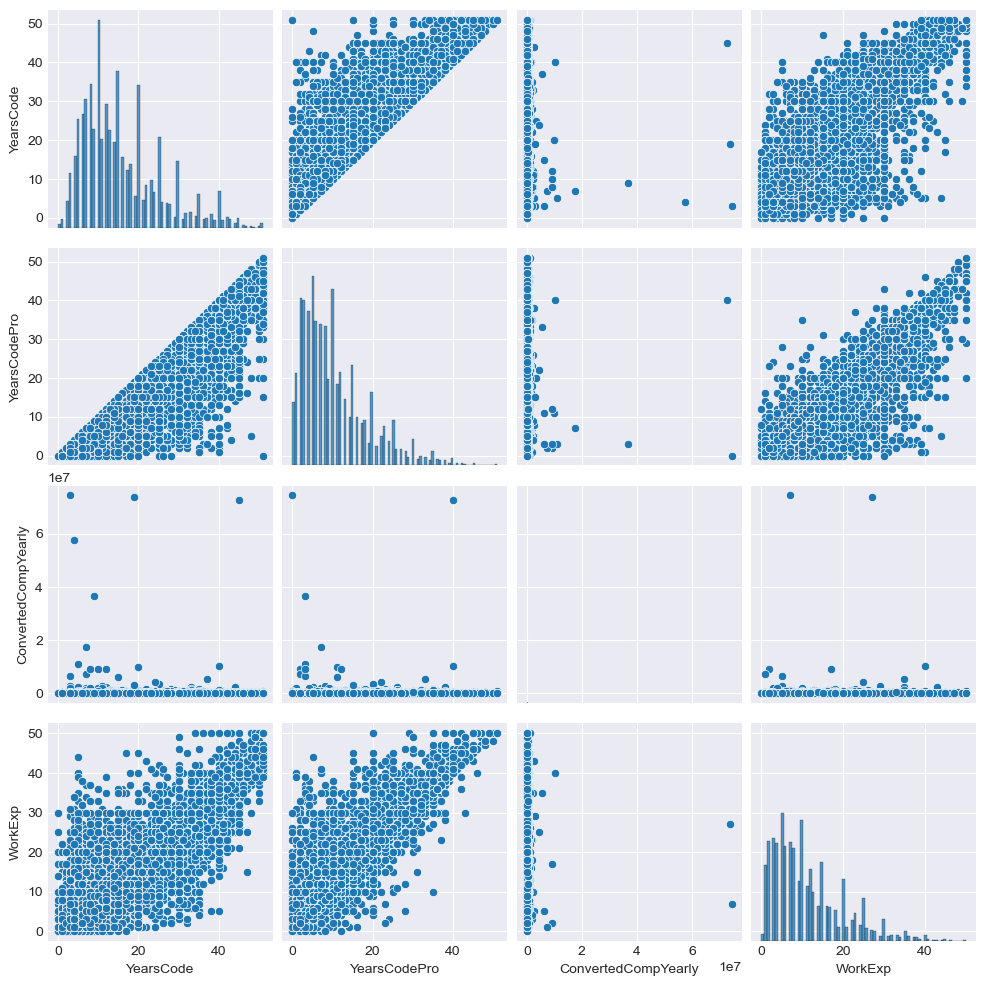

In [3]:
plt.style.use("seaborn-darkgrid")
sns.pairplot(cdf);

In [4]:
# Co-linearity
cdf.corr()

,YearsCode,YearsCodePro,ConvertedCompYearly,WorkExp
YearsCode,1.000000,0.917811,0.035634,0.867433
YearsCodePro,0.917811,1.000000,0.049573,0.930415
ConvertedCompYearly,0.035634,0.049573,1.000000,0.047618
WorkExp,0.867433,0.930415,0.047618,1.000000


## Respondents by a country

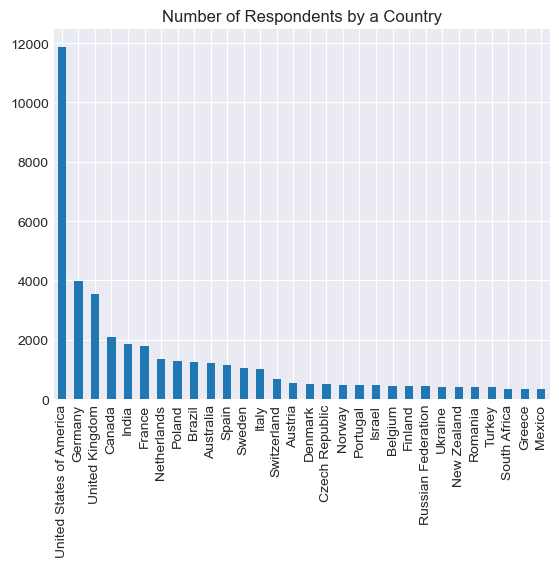

In [5]:
# number of respondents by a country
cdf.Country.value_counts().iloc[:30].plot.bar(title="Number of Respondents by a Country");

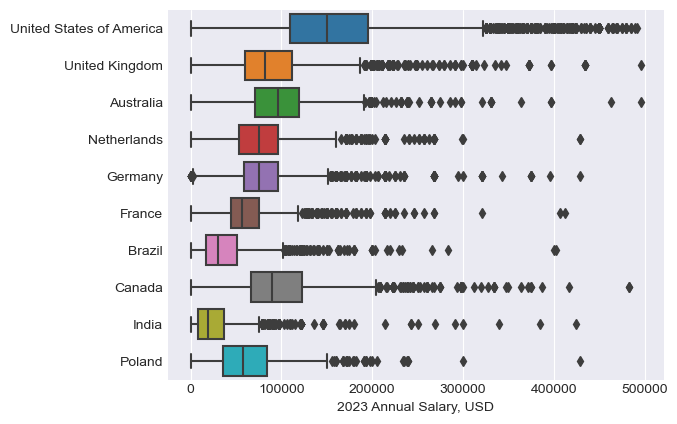

In [6]:
top10 = cdf.Country.value_counts().iloc[:10].index
fltr_countries = cdf.Country.apply(lambda x: x in top10)
fltr_salary = cdf.ConvertedCompYearly < 5.e5

sns.boxplot(data=cdf[fltr_countries&fltr_salary], x="ConvertedCompYearly", y="Country")
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD");

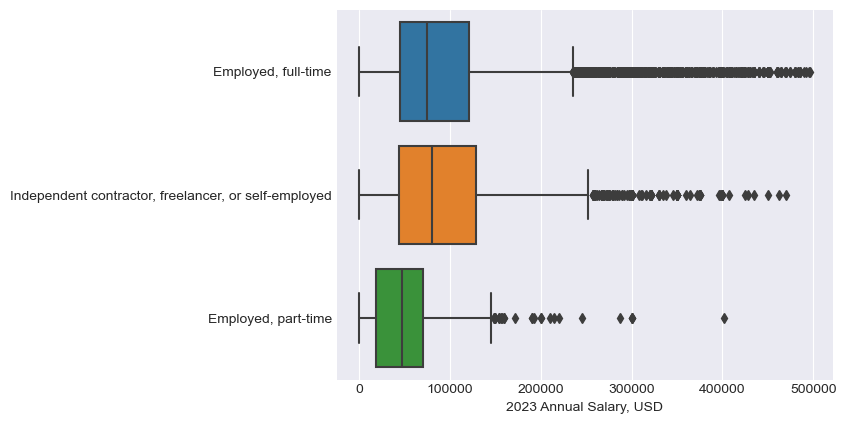

In [7]:
sns.boxplot(data=cdf[fltr_salary], x="ConvertedCompYearly", y="Employment")
plt.ylabel("")
plt.xlabel("2023 Annual Salary, USD");

## Most popular technologies

In [8]:
# add a new feature
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf["NLanguageHaveWorkedWith"] = cdf.LanguageHaveWorkedWith.str.split(";").apply(lambda x: len(x) if x==x else np.nan)

In [9]:
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf["NLanguageHaveWorkedWith"].value_counts(dropna=False).sort_values(ascending=False).head()

4.0    7782
5.0    7362
3.0    7040
6.0    5908
2.0    4795
Name: NLanguageHaveWorkedWith, dtype: int64

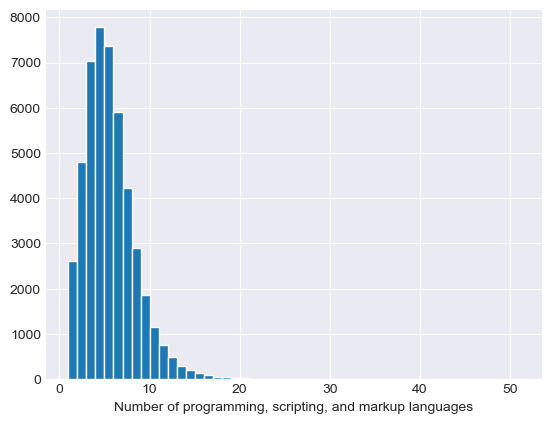

In [10]:
# number of programming, scripting, and markup languages have you done extensive development work in over the past year

cdf.NLanguageHaveWorkedWith.plot.hist(bins=50, 
                                      edgecolor='w')

plt.xlabel("Number of programming, scripting, and markup languages")
plt.ylabel("");

In [11]:
# drop records where Nlang > 12

cdf.drop(index=cdf[cdf.NLanguageHaveWorkedWith>15].index, inplace=True);

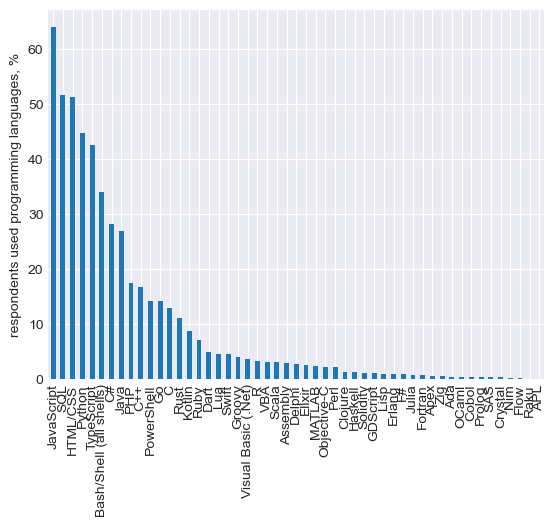

In [12]:
(cdf.LanguageHaveWorkedWith.str.get_dummies(';').mean(axis=0)*100).sort_values(ascending=False).plot.bar()
plt.ylabel("respondents used programming languages, %");

In [13]:
cdf.DevType.value_counts(dropna=False)

Developer, full-stack                            16956
Developer, back-end                               9524
Developer, front-end                              3265
Developer, desktop or enterprise applications     2423
Developer, mobile                                 1638
Other (please specify):                           1477
Engineering manager                               1302
Developer, embedded applications or devices       1259
Data scientist or machine learning specialist      983
DevOps specialist                                  975
Engineer, data                                     903
Research & Development role                        814
Senior Executive (C-Suite, VP, etc.)               763
Cloud infrastructure engineer                      757
Academic researcher                                607
Developer, game or graphics                        488
Data or business analyst                           449
Developer, QA or test                              357
System adm

## Issues with data

* High-dimensional data. The multidimensionality of the data is determined by the number of categorical variables and the level of their categories

* Co-linearity among numerical variables

* Bias in the data based on a number of available records per country

* 2023 annual income has a number of outliers



**All mentioned above indicates that using linear regression to predict annual income is not the best model choice**